In [2]:
import librosa
import IPython.display as player
import matplotlib.pyplot as plt
import librosa.display as disp
import os 
import numpy as np

In [57]:
recordcount = {}
basepath = 'birdclef-2023/train_audio'
folderlist = os.listdir(basepath)


for i in folderlist:
    fp = basepath+'/'+i
    recordcount[i] = len(os.listdir(fp))

print(recordcount)

{'abethr1': 15, 'abhori1': 126, 'abythr1': 28, 'afbfly1': 18, 'afdfly1': 31, 'afecuc1': 90, 'affeag1': 48, 'afgfly1': 8, 'afghor1': 72, 'afmdov1': 37, 'afpfly1': 104, 'afpkin1': 1, 'afpwag1': 81, 'afrgos1': 57, 'afrgrp1': 25, 'afrjac1': 30, 'afrthr1': 45, 'amesun2': 43, 'augbuz1': 12, 'bagwea1': 24, 'barswa': 500, 'bawhor2': 47, 'bawman1': 7, 'bcbeat1': 81, 'beasun2': 34, 'bkctch1': 109, 'bkfruw1': 28, 'blacra1': 60, 'blacuc1': 76, 'blakit1': 262, 'blaplo1': 50, 'blbpuf2': 166, 'blcapa2': 22, 'blfbus1': 38, 'blhgon1': 23, 'blhher1': 16, 'blksaw1': 13, 'blnmou1': 26, 'blnwea1': 17, 'bltapa1': 11, 'bltbar1': 7, 'bltori1': 20, 'blwlap1': 15, 'brcale1': 10, 'brcsta1': 3, 'brctch1': 62, 'brcwea1': 2, 'brican1': 29, 'brobab1': 22, 'broman1': 38, 'brosun1': 30, 'brrwhe3': 8, 'brtcha1': 1, 'brubru1': 81, 'brwwar1': 40, 'bswdov1': 27, 'btweye2': 67, 'bubwar2': 9, 'butapa1': 30, 'cabgre1': 34, 'carcha1': 153, 'carwoo1': 43, 'categr': 166, 'ccbeat1': 13, 'chespa1': 6, 'chewea1': 8, 'chibat1': 79,

In [ ]:
dict(sorted(recordcount.items(), key=lambda item: item[1]))

In [2]:
audiopath = 'birdclef-2023/train_audio/abethr1/XC128013.ogg'

In [3]:
music_array, sr = librosa.load(audiopath)

In [4]:
print(type(music_array), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [5]:
print(music_array.shape, sr)

(1005696,) 22050


In [6]:
player.Audio(audiopath)

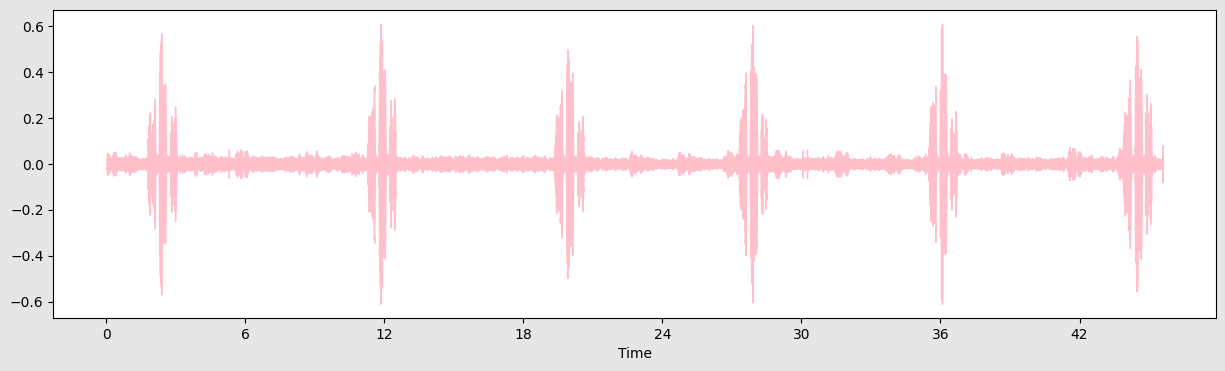

In [7]:
plt.figure(figsize=(15,4), facecolor=(0.9,0.9,0.9))
disp.waveshow(music_array, sr=sr, color='pink')

## Spectogram

In [8]:
x = librosa.stft(music_array) #short term fourier transform
x_db = librosa.amplitude_to_db(abs(x))

In [9]:
x_db

array([[-32.953064 ,   2.3331623,  -6.7253494, ...,  -4.1010966,
         10.930334 ,   9.831181 ],
       [-21.505898 ,   3.9004326,   7.88552  , ...,  -1.236974 ,
         11.799331 ,   9.560514 ],
       [-15.881366 ,   6.158144 ,  12.663747 , ...,   9.87297  ,
         14.086561 ,   8.690235 ],
       ...,
       [-35.92987  , -35.92987  , -35.92987  , ..., -35.92987  ,
        -35.92987  , -35.92987  ],
       [-35.92987  , -35.92987  , -35.92987  , ..., -35.92987  ,
        -35.92987  , -35.92987  ],
       [-35.92987  , -35.92987  , -35.92987  , ..., -35.92987  ,
        -35.92987  , -35.92987  ]], dtype=float32)

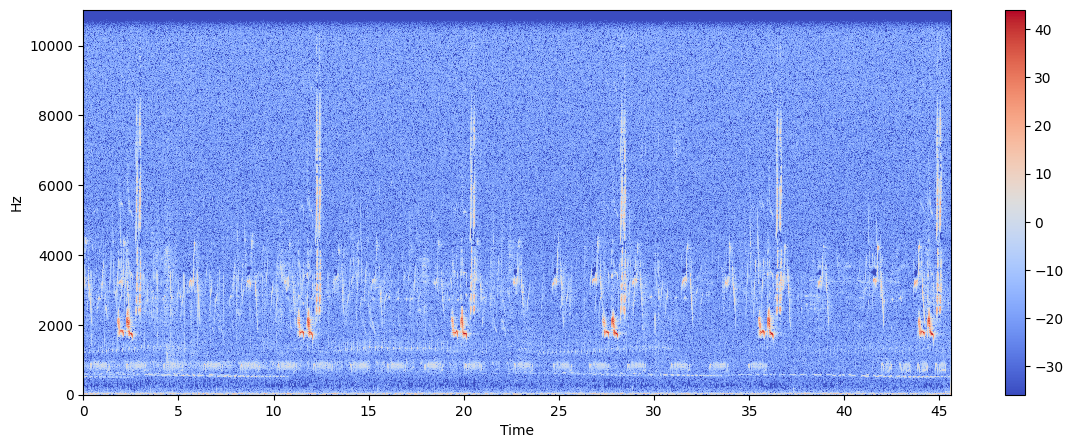

In [10]:
plt.figure(figsize=(14, 5))
disp.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [11]:
tempo, beatframes = librosa.beat.beat_track(y=music_array, sr=sr)
print("Tempo: {:.2f}".format(tempo))

Tempo: 117.45


In [12]:
beat_times = librosa.frames_to_time(beatframes, sr=sr)

In [13]:
beat_times.shape

(87,)

In [14]:
beat_times

array([ 0.06965986,  0.65015873,  1.2306576 ,  1.78793651,  2.32199546,
        2.85605442,  3.39011338,  3.92417234,  4.41179138,  4.94585034,
        5.52634921,  6.03718821,  6.54802721,  7.08208617,  7.59292517,
        8.10376417,  8.66104308,  9.17188209,  9.70594104, 10.19356009,
       10.750839  , 11.28489796, 11.79573696, 12.28335601, 12.81741497,
       13.35147392, 13.86231293, 14.37315193, 14.88399093, 15.37160998,
       15.85922902, 16.34684807, 16.85768707, 17.39174603, 17.90258503,
       18.36698413, 18.85460317, 19.36544218, 19.87628118, 20.38712018,
       20.92117914, 21.4552381 , 21.98929705, 22.54657596, 23.08063492,
       23.61469388, 24.12553288, 24.68281179, 25.21687075, 25.7044898 ,
       26.23854875, 26.79582766, 27.30666667, 27.81750567, 28.28190476,
       28.79274376, 29.30358277, 29.81442177, 30.27882086, 30.78965986,
       31.30049887, 31.78811791, 32.29895692, 32.80979592, 33.36707483,
       33.92435374, 34.48163265, 34.99247166, 35.50331066, 36.01

(-1.0, 1.0)

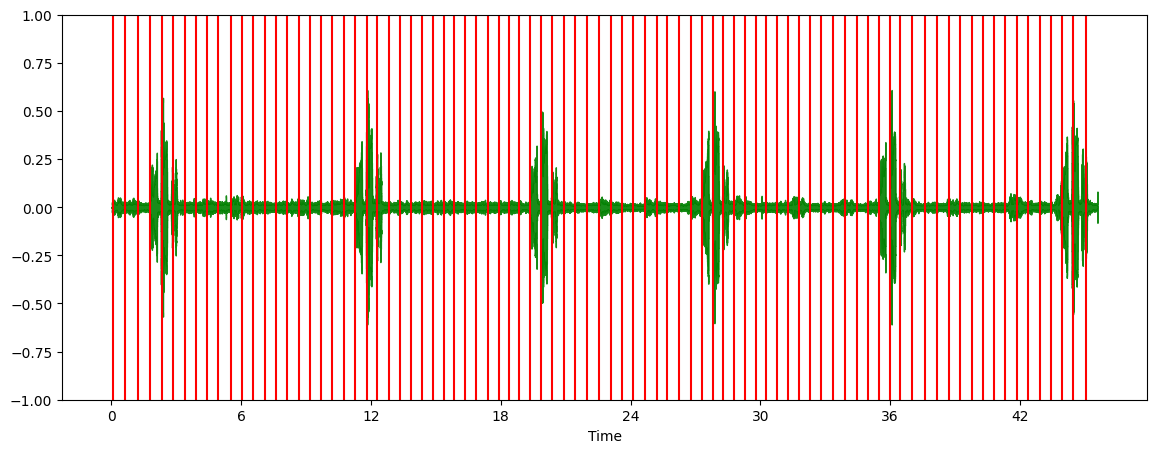

In [15]:
plt.figure(figsize=(14,5))
disp.waveshow(music_array, color='green',alpha=0.9)
plt.vlines(beat_times,-1,1, color='r') #not useful
plt.ylim(-1,1)

## Zero Crossing Rate

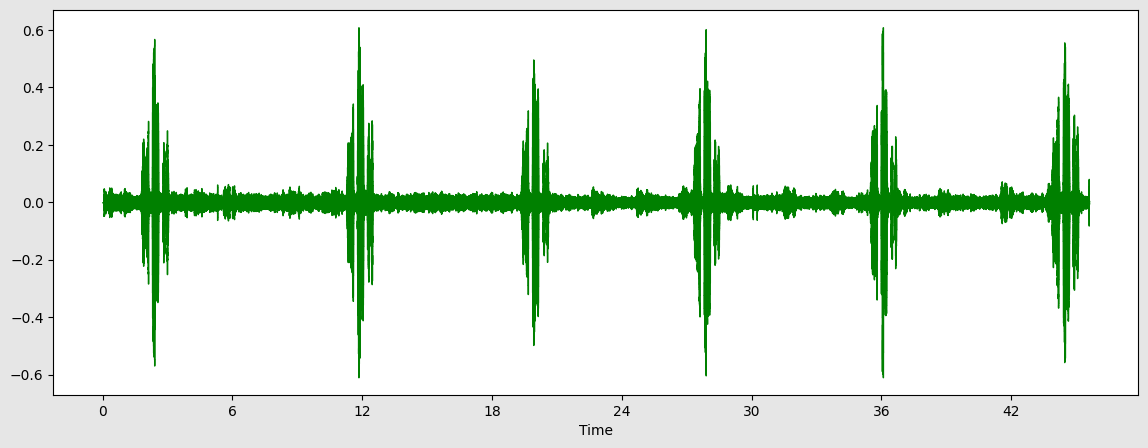

In [86]:
plt.figure(figsize=(14,5), facecolor=(0.9,0.9,0.9))
disp.waveshow(music_array, sr=sr,color='green')

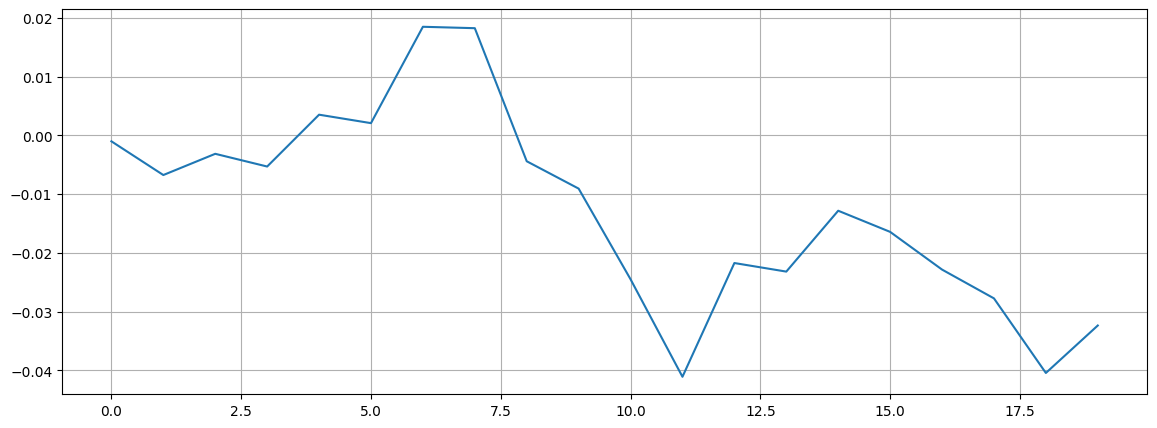

In [17]:
n = 9000
m = 9020
plt.figure(figsize=(14,5))
plt.plot(music_array[n:m])
plt.grid()

In [18]:
zero_crossings = librosa.zero_crossings(music_array[n:m],pad=False)
print(sum(zero_crossings))

2


In [19]:
zero_crossings = librosa.zero_crossings(music_array,pad=False)
print(sum(zero_crossings))

276095


In [20]:
music_array.shape

(1005696,)

In [21]:
def get_zero_crossings(filepath):
    aud, sr = librosa.load(filepath)
    zero_crossing_count = librosa.zero_crossings(aud, pad=False)
    return sum(zero_crossing_count)

In [22]:
x = get_zero_crossings('birdclef-2023/train_audio/abhori1/XC120250.ogg')
print(x)

179099


## Root Mean Square Energy

In [23]:
#librosa.feature.rms(y=music_array)

In [24]:
def get_rmse(filepath):
    aud, sr = librosa.load(filepath)
    rmse = librosa.feature.rms(y=aud)
    return rmse

In [25]:
x = get_rmse(audiopath)
print(x)

[[0.00688831 0.01277397 0.01417463 ... 0.01087252 0.01049471 0.01000161]]


## Spectral Centroid

In [26]:
from sklearn.preprocessing import minmax_scale

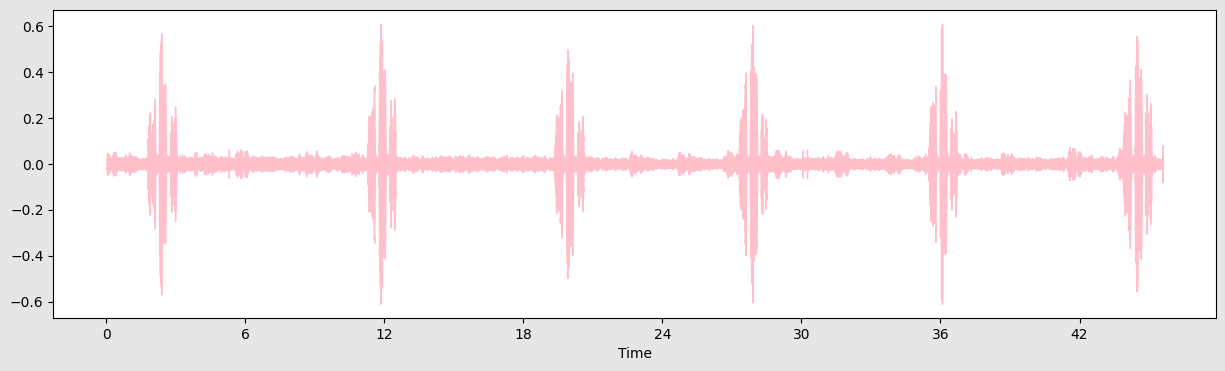

In [27]:
plt.figure(figsize=(15,4), facecolor=(0.9,0.9,0.9))
disp.waveshow(music_array, sr=sr, color='pink')

In [28]:
all_centroid = librosa.feature.spectral_centroid(y=music_array, sr=sr)

In [29]:
all_centroid[0].shape

(1965,)

In [30]:
cframes = range(len(all_centroid[0]))
cframes

range(0, 1965)

In [31]:
t = librosa.frames_to_time(frames=cframes)
t.shape

(1965,)

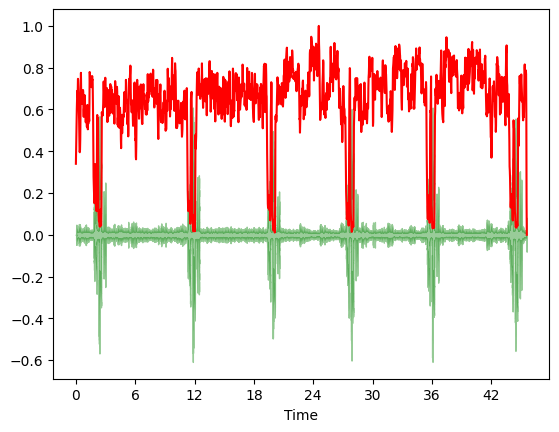

In [32]:
disp.waveshow(music_array, sr=sr, color='green', alpha=0.4)
plt.plot(t, minmax_scale(all_centroid[0], axis=0), color='r')

In [59]:
def spec_centroid(filepath):
    aud, sr = librosa.load(filepath)
    spec_cent = librosa.feature.spectral_centroid(y=aud, sr=sr)
    #frames = range(len(spec_cent[0]))
    #t = librosa.frames_to_time(frames=frames)
    #disp.waveshow(aud, sr=sr, color='green', alpha=0.4)
    #plt.plot(t, minmax_scale(spec_cent[0], axis=0), color='r')
    #print(spec_cent)
    return spec_cent


In [60]:
x = spec_centroid('birdclef-2023/train_audio/abhori1/XC120250.ogg')
print(x)

[[5360.30804169 2978.35979971 2889.38818144 ... 3458.80841866
  3440.1874615  3479.07499169]]


## Spectral Contrast

In [67]:
spectralcontrast = librosa.feature.spectral_contrast(y=music_array, sr=sr)
spectralcontrast.shape

(7, 1965)

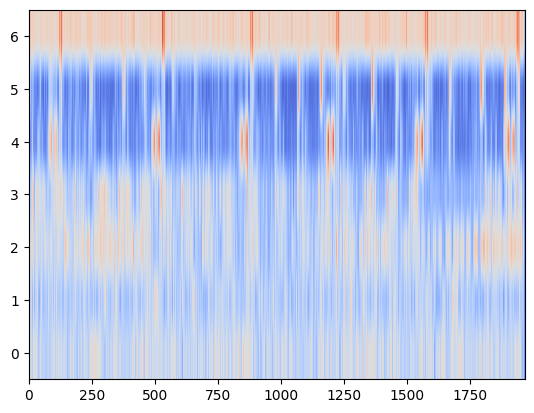

In [82]:
#disp.waveshow(music_array, sr=sr, color='green', alpha=0.9)
plt.imshow(minmax_scale(spectralcontrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

In [76]:
def spectracl_contrast(filepath):
    aud, sr = librosa.load(filepath)
    spec_cont = librosa.feature.spectral_centroid(y=aud, sr=sr)
    #plt.imshow(minmax_scale(spec_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
    return spec_cont

In [78]:
x = spectracl_contrast('birdclef-2023/train_audio/abhori1/XC120250.ogg')
print(x)


[[5360.30804169 2978.35979971 2889.38818144 ... 3458.80841866
  3440.1874615  3479.07499169]]


## Spectral Rolloff

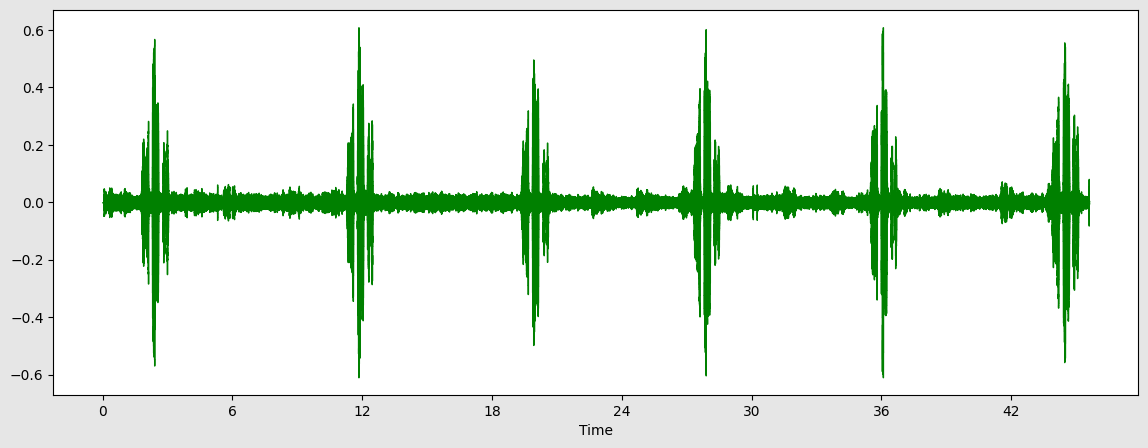

In [105]:
plt.figure(figsize=(14,5), facecolor=(0.9,0.9,0.9))
disp.waveshow(music_array, sr=sr,color='green')

In [90]:
all_spect = librosa.feature.spectral_rolloff(y=music_array+0.01, sr=sr)[0]

In [91]:
all_spect.shape

(1965,)

In [104]:
music_array.shape

(1005696,)

In [92]:
framess = range(len(all_spect))

In [93]:
t = librosa.frames_to_time(framess)

In [94]:
t.shape

(1965,)

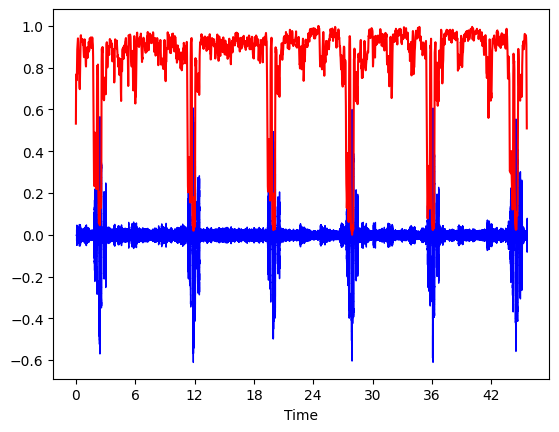

In [97]:
disp.waveshow(music_array, sr=sr, color='blue')
plt.plot(t, minmax_scale(all_spect, axis=0), color='r')

In [109]:
def get_spectral_rolloff(filepath):
    aud, sr = librosa.load(filepath)
    spectralroll = librosa.feature.spectral_rolloff(y=aud+0.01, sr=sr)[0]
    # framespec = range(len(spectralroll))
    # t = librosa.frames_to_time(framespec)
    # plt.figure(figsize=(14,5), facecolor=(0.9,0.9,0.9))
    # disp.waveshow(music_array, sr=sr,color='blue')
    # plt.plot(t, minmax_scale(spectralroll, axis=0), color='r')
    return spectralroll

In [110]:
#'birdclef-2023/train_audio/beasun2/XC127757.ogg'

x = get_spectral_rolloff('birdclef-2023/train_audio/beasun2/XC178023.ogg')

## Chroma Frequencies

In [112]:
hop_length = 512
chromogram = librosa.feature.chroma_stft(y=music_array, sr=sr, hop_length=hop_length)

In [113]:
chromogram

array([[0.43925488, 0.06814333, 0.05437259, ..., 1.        , 0.9579433 ,
        0.931037  ],
       [0.37301707, 0.04183598, 0.02047551, ..., 0.90321076, 0.9505901 ,
        0.9190398 ],
       [0.36509213, 0.04316499, 0.02045878, ..., 0.85101944, 0.9008663 ,
        0.90541273],
       ...,
       [0.38737828, 0.05573474, 0.09303372, ..., 0.7529194 , 0.851333  ,
        0.9216662 ],
       [0.38951033, 0.04109794, 0.02385006, ..., 0.78531426, 0.9614476 ,
        1.        ],
       [0.43835384, 0.05563918, 0.03910404, ..., 0.87371683, 1.        ,
        0.98890096]], dtype=float32)

In [114]:
chromogram.shape

(12, 1965)

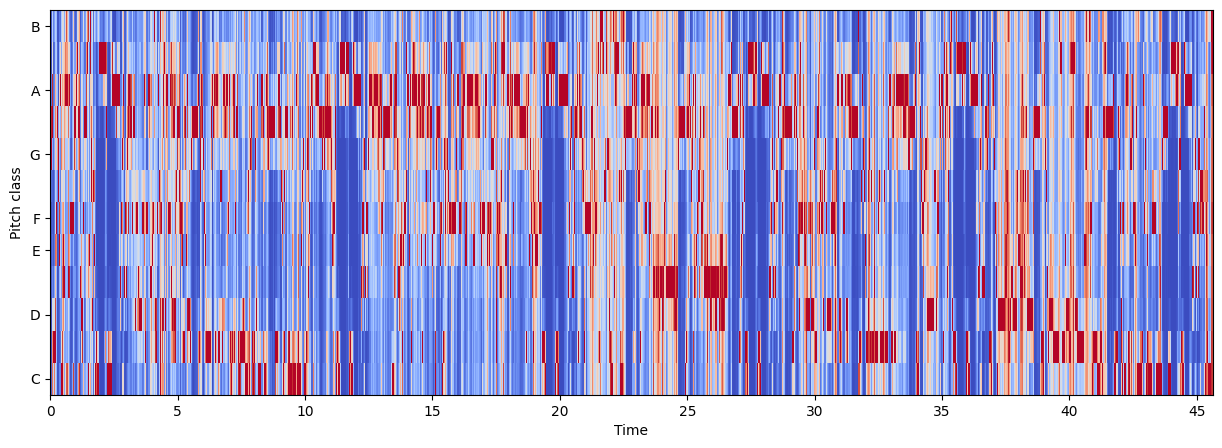

In [118]:
plt.figure(figsize=(15,5))
disp.specshow(chromogram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [128]:
def get_chroma_freq(filename):
    aud, sr = librosa.load(filename)
    hop_length=512
    chrom = librosa.feature.chroma_stft(y=aud, sr=sr, hop_length=hop_length)
    plt.figure(figsize=(20,5))
    disp.specshow(chrom, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
    return chrom

[[0.76515085 0.9911567  0.9925854  ... 0.8246241  0.41290712 0.36202127]
 [0.8624111  0.94511896 0.9754376  ... 0.898915   0.44323263 0.46984434]
 [0.76560163 0.9741035  0.89156646 ... 0.89912146 0.5035564  0.647425  ]
 ...
 [0.62309366 0.9958605  1.         ... 0.55751085 0.48407018 0.40212065]
 [0.9870735  0.9672319  0.96890634 ... 0.43715203 0.4240487  0.4048238 ]
 [0.9468223  0.98215246 0.88982975 ... 0.5341687  0.403756   0.35204685]]


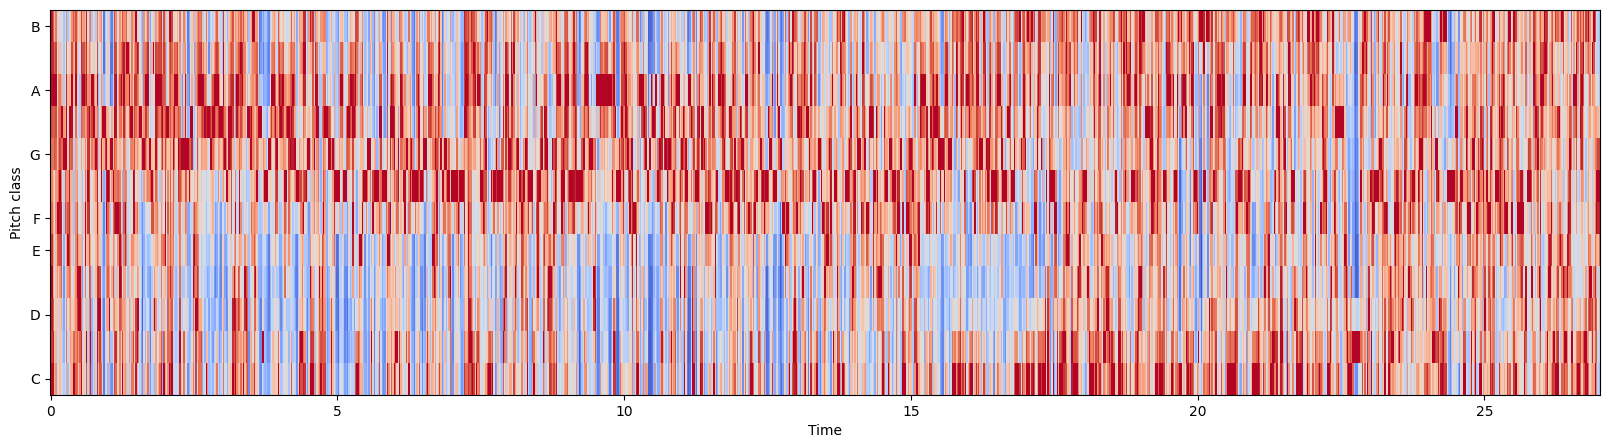

In [129]:
x = get_chroma_freq('birdclef-2023/train_audio/beasun2/XC127757.ogg')
print(x)

## Mel Spectogram

In [142]:
mel = librosa.feature.melspectrogram(y=music_array, sr=sr)
mel_spect = librosa.power_to_db(mel, ref=np.max)

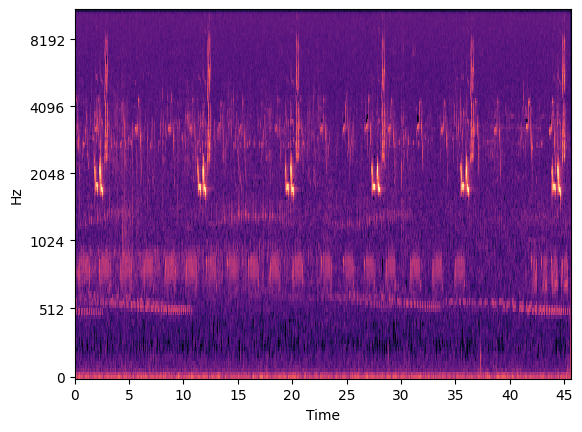

In [143]:
disp.specshow(mel_spect, y_axis='mel', x_axis='time')

In [153]:
def get_mel_spectogram(filepath):
    aud, sr = librosa.load(filepath)
    mel = librosa.feature.melspectrogram(y=aud, sr=sr)
    mel_spect = librosa.power_to_db(mel, ref=np.max)
    disp.specshow(mel_spect, y_axis='mel', x_axis='time')
    return mel

[[7.5345438e-11 4.7077974e-06 2.2112082e-04 ... 1.9173938e-05
  1.3698356e-05 7.2486482e-06]
 [9.6745438e-11 1.0752662e-05 6.6240306e-04 ... 8.5322317e-05
  3.1332253e-05 1.1674845e-05]
 [1.4856835e-10 8.2264651e-06 4.6311627e-04 ... 5.2261472e-05
  3.1610405e-05 8.6665077e-06]
 ...
 [5.7848006e-09 4.9835540e-07 1.1419002e-05 ... 5.2885671e-06
  4.6954983e-06 1.2016327e-06]
 [3.9292010e-09 1.0282170e-07 4.1647781e-06 ... 3.4307316e-06
  1.7102394e-06 3.8142190e-07]
 [2.2346640e-10 6.3448908e-09 2.1175734e-07 ... 1.7725246e-07
  1.6076781e-07 2.1749639e-08]]


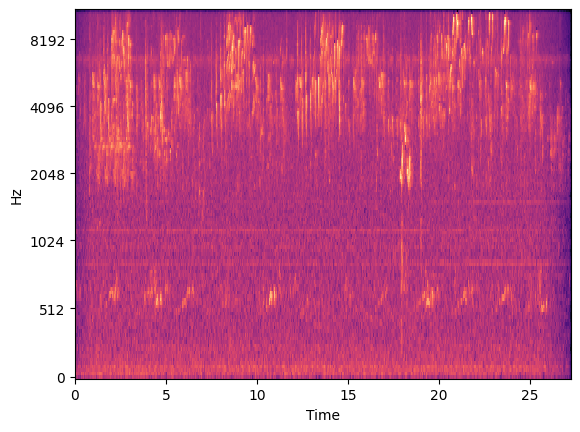

In [154]:
x = get_mel_spectogram('birdclef-2023/train_audio/beasun2/XC178023.ogg')
print(x)